In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
# Read the data from the CSV file
filename = './data/settlements.csv'

data = pd.read_csv(filename, sep=';')

In [6]:
data.head()

,Kod,Nazwa,0-4;mężczyźni;2023;[osoba],0-4;kobiety;2023;[osoba],5-9;mężczyźni;2023;[osoba],5-9;kobiety;2023;[osoba],10-14;mężczyźni;2023;[osoba],10-14;kobiety;2023;[osoba],15-19;mężczyźni;2023;[osoba],15-19;kobiety;2023;[osoba],...,65-69;kobiety;2023;[osoba],70-74;mężczyźni;2023;[osoba],70-74;kobiety;2023;[osoba],75-79;mężczyźni;2023;[osoba],75-79;kobiety;2023;[osoba],80-84;mężczyźni;2023;[osoba],80-84;kobiety;2023;[osoba],85 i więcej;mężczyźni;2023;[osoba],85 i więcej;kobiety;2023;[osoba],Unnamed: 38
0,1600000,OPOLSKIE,18680,17943,23109,21740,23718,22501,22237,20987,...,34970,22886,31188,12695,19448,7569,14605,6430,16114,NaN
1,1600000,OPOLSKIE - miasta,9302,8912,11348,10684,11848,11222,11321,10735,...,20550,13125,19250,7935,12517,4279,8254,3569,8898,NaN
2,1600000,OPOLSKIE - wieś,9378,9031,11761,11056,11870,11279,10916,10252,...,14420,9761,11938,4760,6931,3290,6351,2861,7216,NaN


In [16]:
# First row
row = data.iloc[0]

# Prepare lists for male and female data
male_data = {}
female_data = {}

for col in data.columns:
    if 'mężczyźni' in col:
        age_group = col.split(';')[0]
        male_data[age_group] = row[col]
    elif 'kobiety' in col:
        age_group = col.split(';')[0]
        female_data[age_group] = row[col]

# Align age groups
age_groups = sorted(male_data.keys(), key=lambda x: int(x.split()[0].split('-')[0]) if '-' in x else 85)


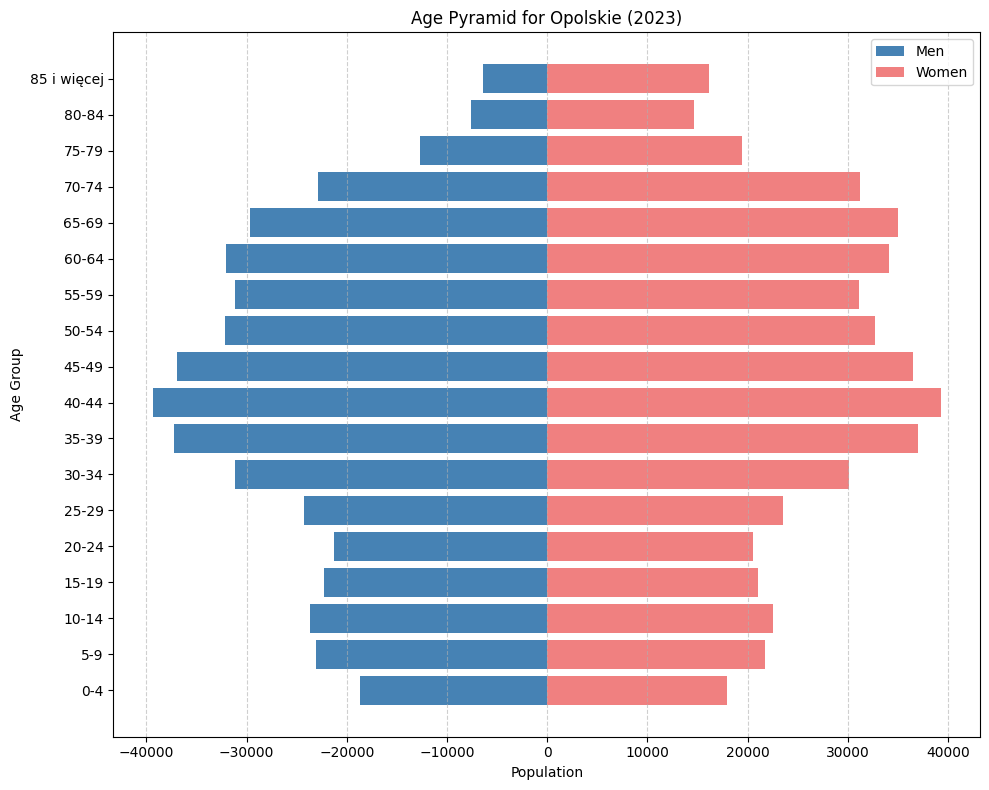

In [17]:
pyramid_df = pd.DataFrame({
    "Age Group": age_groups,
    "Men": [-male_data[age] for age in age_groups],  # negative for left side
    "Women": [female_data[age] for age in age_groups]
})

# Plot
plt.figure(figsize=(10, 8))
plt.barh(pyramid_df["Age Group"], pyramid_df["Men"], color='steelblue', label="Men")
plt.barh(pyramid_df["Age Group"], pyramid_df["Women"], color='lightcoral', label="Women")
plt.xlabel("Population")
plt.ylabel("Age Group")
plt.title("Age Pyramid for Opolskie (2023)")
plt.legend()
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

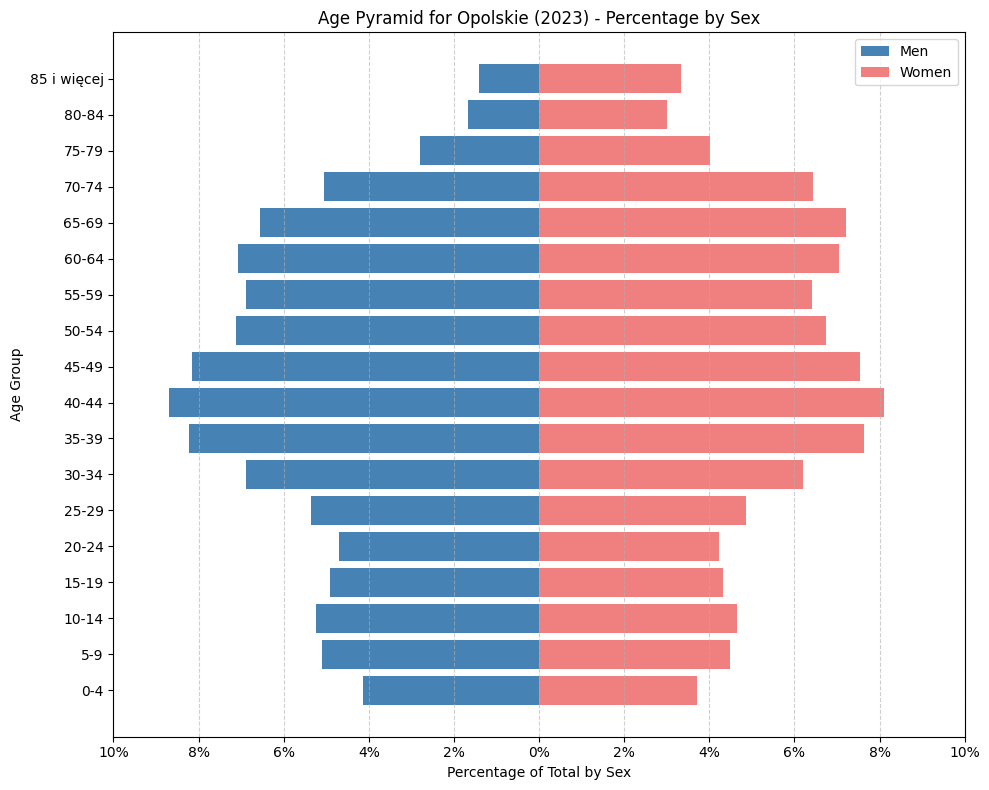

In [69]:
# First row
row = data.iloc[0]
row_city = data.iloc[1]
row_village = data.iloc[2]

# Extract male and female values
male_data = {}
male_data_city = {}
male_data_village = {}

female_data = {}
female_data_city = {}
female_data_village = {}

for col in data.columns:
    if 'mężczyźni' in col:
        age_group = col.split(';')[0]
        male_data[age_group] = row[col]
        male_data_city[age_group] = row_city[col]
        male_data_village[age_group] = row_village[col]
    elif 'kobiety' in col:
        age_group = col.split(';')[0]
        female_data[age_group] = row[col]
        female_data_city[age_group] = row_city[col]
        female_data_village[age_group] = row_village[col]

# Sort age groups logically
age_groups = sorted(male_data.keys(), key=lambda x: int(x.split()[0].split('-')[0]) if '-' in x else 85)

# Calculate total population per sex
total_men = sum(male_data.values())
total_women = sum(female_data.values())

pyramid_df = pd.DataFrame({
    "Age Group": age_groups,
    "Men %": [-(male_data[age] / total_men * 100) for age in age_groups],  # Negative for left side
    "Women %": [female_data[age] / total_women * 100 for age in age_groups],
    "Men [person]": [male_data[age] for age in age_groups],
    "Women [person]": [female_data[age] for age in age_groups],
    "Men (cities)": [male_data_city[age] for age in age_groups],
    "Women (cities)": [female_data_city[age] for age in age_groups],
    "Men (villages)": [male_data_village[age] for age in age_groups],
    "Women (villages)": [female_data_village[age] for age in age_groups],
})

# Plot
plt.figure(figsize=(10, 8))
plt.barh(pyramid_df["Age Group"], pyramid_df["Men %"], color='steelblue', label="Men")
plt.barh(pyramid_df["Age Group"], pyramid_df["Women %"], color='lightcoral', label="Women")
plt.xlabel("Percentage of Total by Sex")
plt.ylabel("Age Group")
plt.title("Age Pyramid for Opolskie (2023) - Percentage by Sex")

xticks = list(range(-10, 11, 2))  # Adjust range if needed
plt.xticks(xticks, [f"{abs(x)}%" for x in xticks])

plt.legend()
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


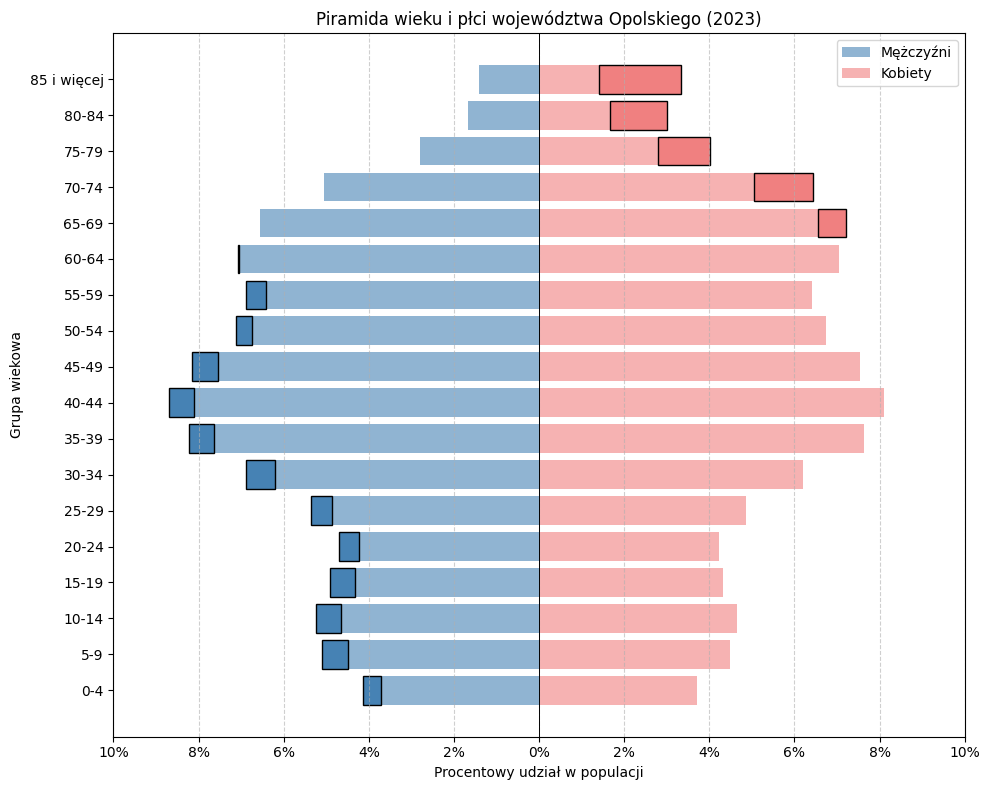

In [59]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data: pyramid_df["Age Group"], "Men %", "Women %"
# Assuming you already have `pyramid_df` created like before

plt.figure(figsize=(10, 8))

for i, row in pyramid_df.iterrows():
    age = row["Age Group"]
    men_pct = row["Men %"]
    women_pct = row["Women %"]

    base_val = min(abs(men_pct), abs(women_pct))
    advantage_val = abs(abs(men_pct) - abs(women_pct))

    if abs(men_pct) > abs(women_pct):
        # Draw base shared part
        plt.barh(age, -base_val, color='steelblue', alpha=0.6)
        # Draw advantage overlay
        plt.barh(age, -advantage_val, left=-base_val, color='steelblue', edgecolor='black', label='_nolegend_')
        # Draw woman bar (no advantage)
        plt.barh(age, women_pct, color='lightcoral', alpha=0.6)
    else:
        # Draw base shared part
        plt.barh(age, base_val, color='lightcoral', alpha=0.6)
        # Draw advantage overlay
        plt.barh(age, advantage_val, left=base_val, color='lightcoral', edgecolor='black', label='_nolegend_')
        # Draw man bar (no advantage)
        plt.barh(age, men_pct, color='steelblue', alpha=0.6)

# Axis formatting
plt.xlabel("Procentowy udział w populacji")
plt.ylabel("Grupa wiekowa")
plt.title("Piramida wieku i płci województwa Opolskiego (2023)")

xticks = list(range(-10, 11, 2))
plt.xticks(xticks, [f"{abs(x)}%" for x in xticks])

plt.axvline(0, color='black', linewidth=0.7, label='_nolegend_')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.legend(["Mężczyźni", "Kobiety"])
plt.tight_layout()
plt.show()


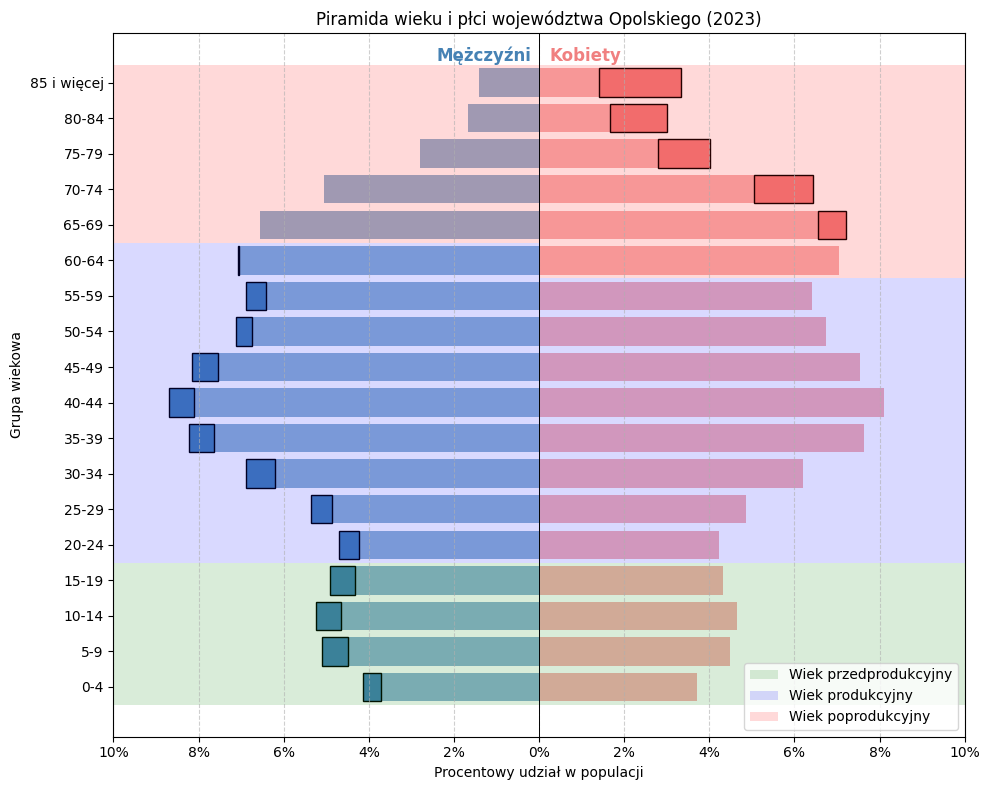

In [61]:
import pandas as pd
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 8))

for i, row in pyramid_df.iterrows():
    age = row["Age Group"]
    men_pct = row["Men %"]
    women_pct = row["Women %"]

    base_val = min(abs(men_pct), abs(women_pct))
    advantage_val = abs(abs(men_pct) - abs(women_pct))

    if abs(men_pct) > abs(women_pct):
        ax.barh(age, -base_val, color='steelblue', alpha=0.6)
        ax.barh(age, -advantage_val, left=-base_val, color='steelblue', edgecolor='black', label='_nolegend_')
        ax.barh(age, women_pct, color='lightcoral', alpha=0.6)
    else:
        ax.barh(age, base_val, color='lightcoral', alpha=0.6)
        ax.barh(age, advantage_val, left=base_val, color='lightcoral', edgecolor='black', label='_nolegend_')
        ax.barh(age, men_pct, color='steelblue', alpha=0.6)

# Get age order from the DataFrame
age_order = list(pyramid_df["Age Group"])

# Extract lower bounds of age groups (e.g. "60-64" → 60)
age_lower_bounds = [int(age.split('-')[0] if '-' in age else age.split(' ')[0]) for age in age_order]

# Define index ranges for economic age groups per sex
pre_idx = [i for i, age in enumerate(age_lower_bounds) if age <= 17]

# Men: 18–64
prod_men_idx = [i for i, age in enumerate(age_lower_bounds) if 18 <= age <= 64]
post_men_idx = [i for i, age in enumerate(age_lower_bounds) if age >= 65]

# Women: 18–59
prod_women_idx = [i for i, age in enumerate(age_lower_bounds) if 18 <= age <= 59]
post_women_idx = [i for i, age in enumerate(age_lower_bounds) if age >= 60]

# Highlighting function
def highlight_range(ax, indices, color, label, x_start, x_end):
    if not indices:
        return
    y_start = indices[0] - 0.5
    y_end = indices[-1] + 0.5
    ax.axhspan(y_start, y_end, xmin=x_start, xmax=x_end, facecolor=color, alpha=0.15, label=label)

# Highlight zones
highlight_range(ax, pre_idx, 'green', 'Wiek przedprodukcyjny', 0.0, 1.0)
highlight_range(ax, prod_men_idx, 'blue', 'Wiek produkcyjny', 0.0, 0.5)
highlight_range(ax, post_men_idx, 'red', 'Wiek poprodukcyjny', 0.0, 0.5)
highlight_range(ax, prod_women_idx, 'blue', 'Wiek produkcyjny', 0.5, 1.0)
highlight_range(ax, post_women_idx, 'red', 'Wiek poprodukcyjny', 0.5, 1.0)

# Axis formatting
ax.set_xlabel("Procentowy udział w populacji")
ax.set_ylabel("Grupa wiekowa")
ax.set_title("Piramida wieku i płci województwa Opolskiego (2023)")

xticks = list(range(-10, 11, 2))
ax.set_xticks(xticks)
ax.set_xticklabels([f"{abs(x)}%" for x in xticks])

ax.axvline(0, color='black', linewidth=0.7)
ax.grid(axis='x', linestyle='--', alpha=0.6)

# Legend (deduplicated)
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(), loc='lower right')

ax.text(-1.3, len(pyramid_df) - 0.5, "Mężczyźni", ha='center', va='bottom', fontsize=12, fontweight='bold', color='steelblue')
ax.text(1.1, len(pyramid_df) - 0.5, "Kobiety", ha='center', va='bottom', fontsize=12, fontweight='bold', color='lightcoral')

plt.tight_layout()
plt.show()


In [70]:
non_productive_age = sum(pyramid_df.iloc[pre_idx]["Men [person]"]) + sum(pyramid_df.iloc[pre_idx]["Women [person]"]) + sum(pyramid_df.iloc[post_men_idx]["Men [person]"]) + sum(pyramid_df.iloc[post_women_idx]["Women [person]"])
productive_age = sum(pyramid_df.iloc[prod_men_idx]["Men [person]"]) + sum(pyramid_df.iloc[prod_men_idx]["Women [person]"])
dependency_ratio = non_productive_age / productive_age
print(f"Dependency Ratio: {dependency_ratio:.2f}")

Dependency Ratio: 0.70


In [74]:
feminine_coef = sum(pyramid_df["Women [person]"]) / sum(pyramid_df["Men [person]"]) * 100
print(f"Feminine Coefficient: {feminine_coef:.2f}%")

Feminine Coefficient: 107.00%


In [75]:
feminine_coef_cities = sum(pyramid_df["Women (cities)"]) / sum(pyramid_df["Men (cities)"]) * 100
print(f"Feminine Coefficient (Cities): {feminine_coef_cities:.2f}%")

Feminine Coefficient (Cities): 111.19%


In [76]:
feminine_coef_villages = sum(pyramid_df["Women (villages)"]) / sum(pyramid_df["Men (villages)"]) * 100
print(f"Feminine Coefficient (Villages): {feminine_coef_villages:.2f}%")

Feminine Coefficient (Villages): 102.51%
